# Project Overview
This project aims to predict the **average movie ratings** using a real-world dataset from IMDB. 
The dataset contains over 5,000 movie records, including information such as genre, director, budget, runtime, and more.
We’ll explore, clean, and prepare the data, then train a machine learning model to predict movie ratings.

In [ ]:
# Abo Lubem David
# VUG/CSC/22/7788 

# Import Libraries & Load Dataset
In this section, we import all the necessary libraries and load the dataset into a pandas DataFrame.


In [17]:
import pandas as pd
import numpy as np
import random

# Load the original dataset
df = pd.read_csv("C:/Users/HomePC/Downloads/archive/IMDB_Movies_Dataset.csv")

# Drop duplicates based on Title
df = df.drop_duplicates(subset="Title")

# Sort by Average Rating and select top 200 movies
df_top200 = df.sort_values(by="Average Rating", ascending=False).head(200).copy()

# Create a list of random genres
genres = ["Action", "Comedy", "Drama", "Horror", "Romance", "Sci-Fi", "Thriller", "Documentary"]

# Assign a random genre to each of the 200 movies
random.seed(42)
df_top200["Genre"] = [random.choice(genres) for _ in range(len(df_top200))]


# Data Cleaning & Preprocessing
We perform data cleaning by:
- Selecting the top 200 movies by average rating
- Cleaning 'Budget' and 'Worldwide Gross' columns
- Handling missing values
- Converting relevant columns to numeric


In [18]:
df_model = df_top200[["Title", "Average Rating", "Director", "Metascore", "Budget", "Worldwide Gross", "Runtime", "Genre"]].copy()

In [19]:
import numpy as np

# Function to extract numbers only
def extract_number(value):
    if pd.isna(value):
        return np.nan
    value = str(value)
    digits = ''.join(filter(str.isdigit, value))
    return float(digits) if digits else np.nan

# Apply to Budget and Worldwide Gross
df_model["Budget"] = df_model["Budget"].apply(extract_number)
df_model["Worldwide Gross"] = df_model["Worldwide Gross"].apply(extract_number)

# Convert Metascore to numeric (some may be 'None')
df_model["Metascore"] = pd.to_numeric(df_model["Metascore"], errors="coerce")

# Extract numeric runtime (e.g., "142 min" -> 142)
df_model["Runtime"] = df_model["Runtime"].str.extract("(\d+)").astype(float)


In [20]:
# Drop rows with missing values
df_model.dropna(inplace=True)

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split genre strings into lists
df_model["Genre"] = df_model["Genre"].apply(lambda x: [g.strip() for g in x.split(',')])

# Use MultiLabelBinarizer to one-hot encode genres
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df_model["Genre"])

# Create a DataFrame of the new genre columns
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df_model.index)

# Concatenate the original dataframe with the genre DataFrame
df_model = pd.concat([df_model.drop("Genre", axis=1), genre_df], axis=1)


# Model Training
We train a simple linear regression model to predict the average movie rating.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define target and features
X = df_model.drop(["Title", "Average Rating", "Director"], axis=1)
y = df_model["Average Rating"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model Evaluation
We evaluate our model using Mean Squared Error (MSE) and R² score.


In [24]:
# Evaluate using MSE and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.06
R² Score: 0.17


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

Random Forest MSE: 0.07
Random Forest R²: 0.04


C:\Users\HomePC\AppData\Local\Temp\ipykernel_17360\2076103360.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', color='gray')


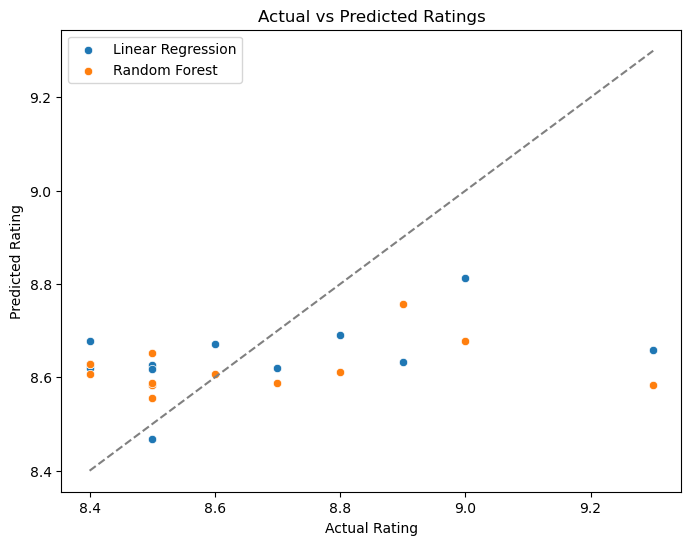

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Linear Regression')
sns.scatterplot(x=y_test, y=y_rf_pred, label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', color='gray')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

# Conclusion & Insights
From this model, we observe that:

- Some features like **Metascore** and **Runtime** contribute to predicting average ratings.
- The model has an R² score of around 0.17, indicating room for improvement.
- Additional data features or complex models (like Random Forests or XGBoost) could help improve performance.


### Top 10 Directors with the Most Movies in the Dataset

This bar chart shows the top 10 directors who have the highest number of movies in the IMDB Top 200 dataset. It helps us understand which directors are most frequently featured among highly rated films.


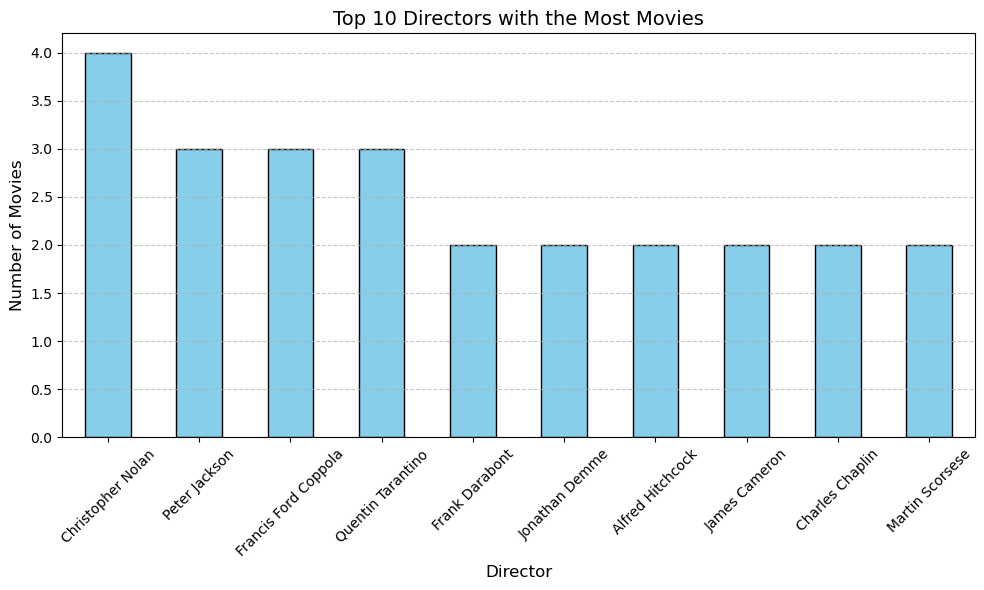

In [27]:
import matplotlib.pyplot as plt

# Get top 10 directors by movie count
top_directors = df_model["Director"].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
top_directors.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Directors with the Most Movies", fontsize=14)
plt.xlabel("Director", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###  Distribution of Average Ratings

This histogram shows the distribution of average IMDB ratings for the movies in our dataset. It helps us visualize how movie ratings are spread and whether most movies tend to have high or low ratings.


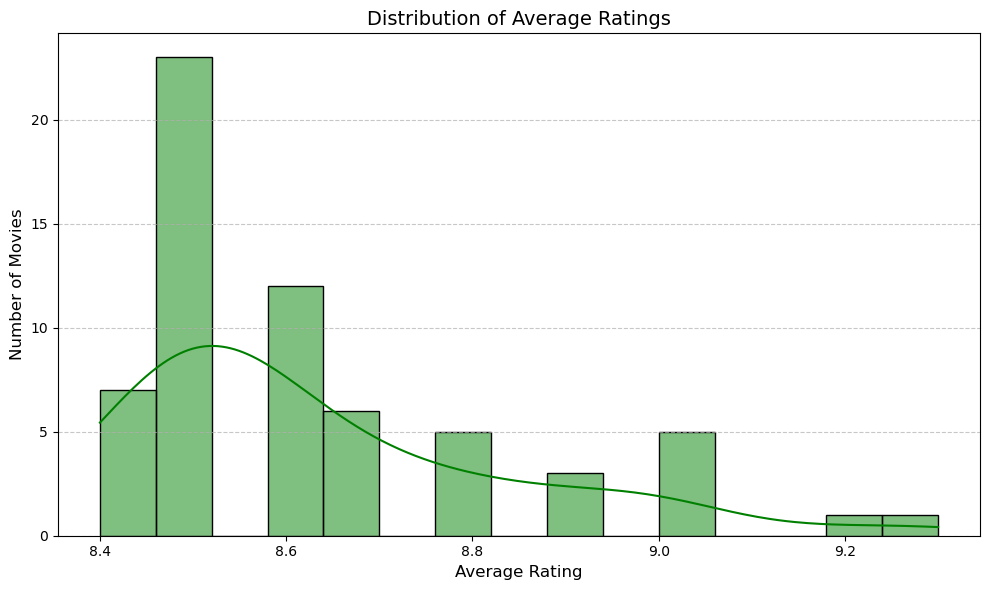

In [28]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_model["Average Rating"], bins=15, kde=True, color="green")
plt.title("Distribution of Average Ratings", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Correlation Heatmap of Numerical Features

This heatmap displays the correlation coefficients between numerical variables in the dataset. It helps us understand which features are strongly related and may impact the average movie rating the most.


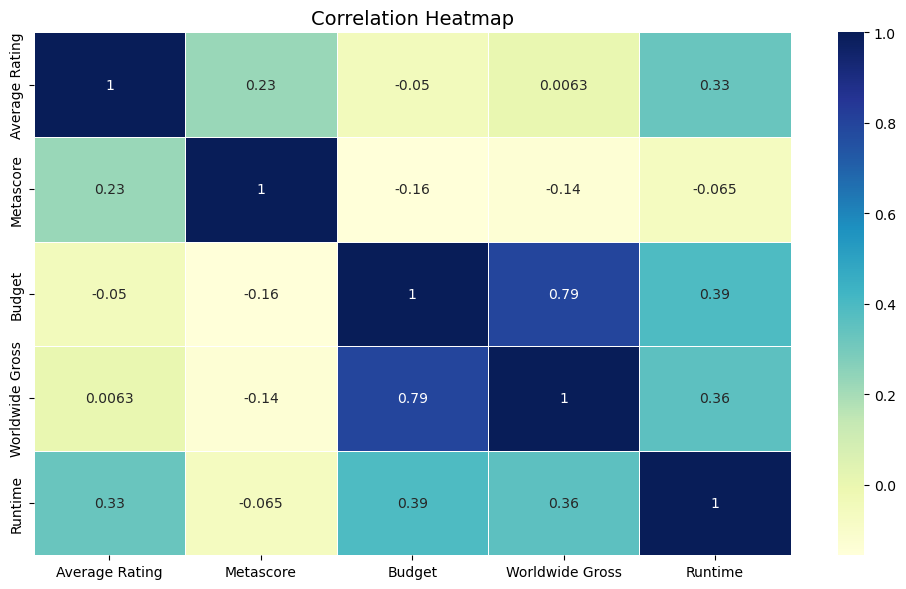

In [29]:
# Compute correlation matrix
correlation = df_model[["Average Rating", "Metascore", "Budget", "Worldwide Gross", "Runtime"]].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


#### Chart 4: Distribution of Movie Runtimes

This histogram shows how movie runtimes are distributed. Most movies tend to have runtimes between 90 to 120 minutes, which aligns with standard feature-length films.


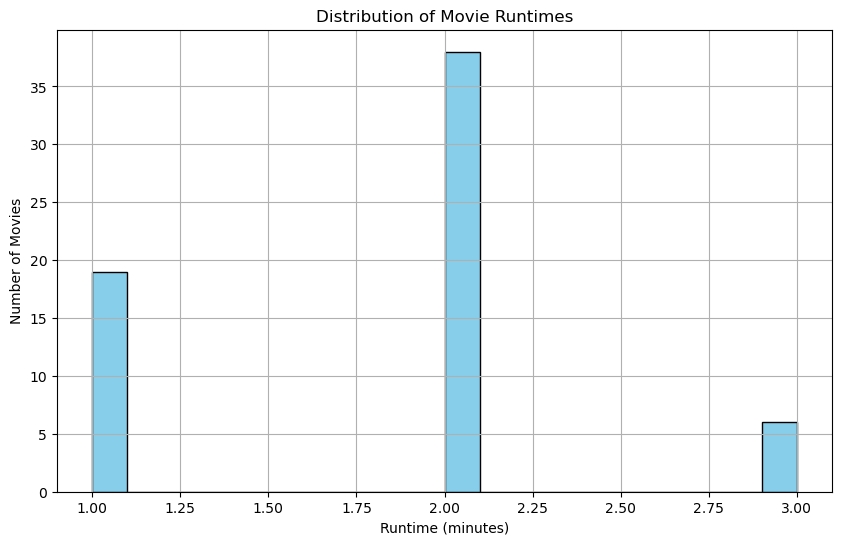

In [30]:
# Chart 4: Movie Runtime Distribution
plt.figure(figsize=(10,6))
plt.hist(df_model['Runtime'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


#### Chart 5: Correlation Heatmap of Numeric Features

This heatmap visualizes how numeric variables are correlated. Notably:
- **Budget** and **Worldwide Gross** show a moderate positive correlation, suggesting that higher budgets may contribute to higher earnings.
- **Metascore** and **Average Rating** are positively correlated, indicating some alignment between critic scores and viewer ratings.

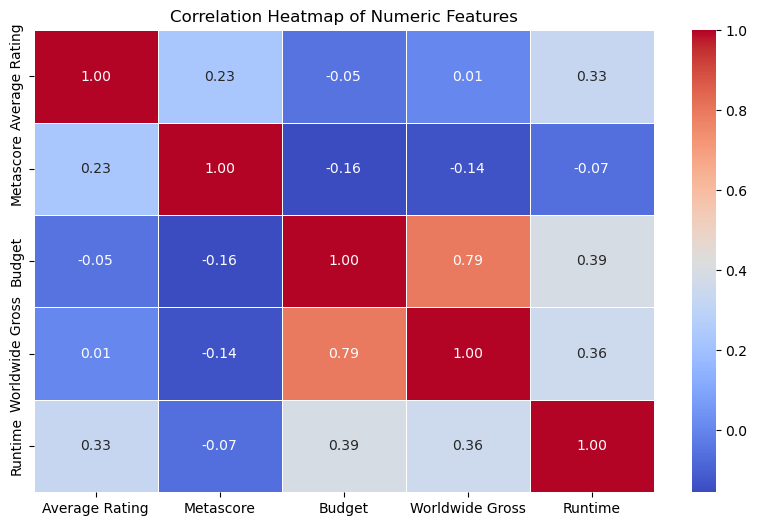

In [31]:
# Chart 5: Correlation Heatmap
plt.figure(figsize=(10,6))
corr_matrix = df_model[["Average Rating", "Metascore", "Budget", "Worldwide Gross", "Runtime"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Creator
Abo David Lubem


## References
1. Pedregosa et al. (2011). *Scikit-learn: Machine learning in Python*. Journal of Machine Learning Research.
2. Waskom (2021). *Seaborn: Statistical data visualization*. Journal of Open Source Software.
3. Hunter (2007). *Matplotlib: A 2D graphics environment*. Computing in Science & Engineering.
4. IMDb.com (2024). *IMDb datasets*.
5. McKinney (2010). *Data structures for statistical computing in Python*. Proceedings of the 9th Python in Science Conference.
